## 0. Installation

Pour charger tous les modules utiles, il suffit d'exécuter la commande suivante à la racine du répertoire :

```sh
pip install -r requirements.txt
```

La première calibration d'un modèle nécessite un surplus de RAM pouvant aller jusqu'à +9 Go. Si votre ordinateur ne dispose pas d'une RAM suffisante, alors il risque de crasher. Pour y remédier, vous pouvez augmenter l'espace SWAP pour étendre virtuellement la RAM (il existe des tutos en ligne).

Une connexion internet est également nécessaire pour le téléchargement des données.

## 1. Structure du répertoire

Du point de vue utilisateur, toutes les fonctions, variables et classes utiles sont accessibles depuis le fichier `main.py` situé à la racine.

La structure du répertoire comprend un certain nombre de dossiers, dont certains sont créés automatiquement lors de la première exécution du programme.

```
MatMat-Trade
│   main.py
│   main.ipynb
|   ...
│
└───src
│   │   figures.py
│   │   model.py
│   │   scenarios.py
│   │   settings.py
│   │   stressors.py
│   │   utils.py
|   |   ...
│   
└───data
│   └───aggregation
│   |   │   ...
|   |
│   └───capital_consumption
│   |   │   ...
|   |
│   └───exiobase
│       └───2015__pxp
|   |   |   |   ...
|   |
│   └───models
│       └───2015__pxp__opti_S__GES
|   |   |   |   ...
| 
└───doc
|   │   ...
|
└───figures
│   └───2015__pxp__opti_S__GES
|   |   |   ...
|   |
|   └───multimodel
|   |   |   ...
|   |
|   |   ...

```

- le fichier `main.py` regroupe les fonctions, variables et classes prêtes à être utilisées
- le fichier `main.ipynb` est un notebook de prise en main rapide du répertoire
- le dossier `src` regroupe les fichiers de code
    - le fichier `figures.py` regroupe les fonctions qui éditent les différents graphiques, et leurs fonctions auxiliaires
    - le fichier `model.py` définit les objets `Model` et `Counterfactual` qui font le lien avec tous les autres fichiers
    - le fichier `scenarios.py` définit les différents scénarios de commerce international
    - le fichier `settings.py` regroupe les différents paramètres d'exécution (chemins d'accès, palette graphique...)
    - le fichier `stressors.py` regroupe des exemples de dictionnaires de paramètres pour la prise en compte de différents stressors (GES, matières, usage des sols)
    - le fichier `utils.py` est vue comme une boîte à outils qui regroupe diverses fonctions transversales
- le dossier `data` stocke différentes structures de données téléchargées ou générées par le programme
    - le sous-dossier `aggregation` regroupe différentes matrices d'agrégation (par région et par secteur), utilisées pour augmenter ou réduire la granularité des modèles
    - le sous-dossier `capital_consumption` regroupe des données brutes de consommation de capital (si nécessaire, les données sont téléchargées puis stockées en vue d'un usage ultérieur)
    - le sous-dossier `exiobase` regroupe les données brutes des bases Exiobase 3 téléchargées, caractérisées par leur année (ex : 2015) et leur système (ex : pxp)
    - le sous-dossier `models` regroupe les sauvegardes des différents modèles générés, caractérisés par leur année (ex : 2015), leur système (ex : pxp), leur matrice d'agrégation (ex : opti_S), leur stressor (ex : GES) et éventuellement par l'endogénéisation du capital si c'est le cas.
- le dossier `doc` regroupe des documents utiles
- le dossier `figures` regroupe les figures générées
    - le sous-dossier `multimodel` regroupe les figures comparant plusieurs modèles (ex : évolution temporelle)
    - les autres sous-dossiers correspondent chacun à un modèle précis, et regroupent les figures associées par contrefactuel et par grandeur représentée

## 2. La classe `Model`

L'outil central de ce code est la classe `Model`. La première création d'une instance peut prendre du temps pour télécharger la base et pour la calibrer. Lorsque la base a été téléchargée, alors elle est enregistrée. De même, lorsqu'une calibration est effectuée, l'objet obtenu est également enregistré.

La première fois, cette étape peut durer une dizaine de minutes, et nécessite de la RAM et une connexion internet. Les fois suivantes, cette étape dure moins de 5 secondes.

La classe `Model` présente plusieurs arguments :
- `base_year` : année de base du modèle.
- `system` : système à utiliser (au sens d'Exiobase, donc "pxp" ou "ixi").
- `aggregation_name` : nom d'un fichier du dossier `data/aggregation` (sans l'extension, par exemple "opti_S" pour `opti_S.xlsx`), permettant de gérer la granularité géographique et sectorielle du modèle.
- `calib` : pour forcer la recalibration du modèle (par exemple si on choisit d'utiliser Exiobase 2 plutôt qu'Exiobase 3 dans un modèle ayant déjà été calibré précédemment).
- `regions_mapper` : agrégateur de régions pour l'affichage (cette agrégation n'a aucune incidence sur le modèle et les résultats, elle permet seulement d'améliorer la lisibilité des graphiques en agrégeant les résultats), ce paramètre peut être modifié ultérieurement sans avoir à créer un nouveau modèle. Un exemple est donné dans `src/settings.py`.
- `sectors_mapper` : même principe que `regions_mapper` mais avec les secteurs.
- `capital` : permet d'endogénéiser le capital dans le modèle.
- `stressor_params` : dictionnaire de paramètres d'un stressor au choix (GES, matières, usage des sols...), plusieurs exemples dans `src/stressors.py`.

Tous ces arguments ont une valeur par défaut, il n'est donc pas nécessaire de tous les saisir systématiquement : il suffit de saisir ceux dont on souhaite changer la valeur par défaut. Par défaut, le modèle généré se rapporte à l'année 2015 avec un système "pxp", il utilise l'agrégation du fichier `opti_S.xslx`, les mappers du fichier `src/settings.py`, il n'endogénéise pas le capital et il se focalise sur les émissions de GES.

In [1]:
from main import Model
import pandas as pd

model = Model(aggregation_name="opti_S")


Les objets `Model` disposent de plusieurs méthodes et attributs utiles documentés dans le fichier `model.py`. Voici ci-dessous quelques exemples.

In [2]:
print("Liste des régions : ", model.regions)
print("Année : ", model.base_year)
print("Caractérisation détaillée du modèle : ", model.summary_long)

Liste des régions :  ['FR', 'UK, Norway, Switzerland', 'United States', 'Asia, Row Europe', 'China, RoW Asia and Pacific', 'RoW America,Turkey, Taïwan', 'RoW Middle East, Australia', 'Brazil, Mexico', 'South Africa', 'Japan, Indonesia, RoW Africa', 'EU']
Année :  2015
Caractérisation détaillée du modèle :  2015__pxp__opti_S__ghg


Parmi ces attributs, le plus important est `iot` qui est en fait le modèle MRIO fourni par `pymrio` : il s'agit d'un objet `pymrio.IOSystem`. Il dispose d'un compte satellite `stressor_extension` qui contient les informations relatives aux stressors, structuré selon la nomenclature standard de la librairie `pymrio`.

In [3]:
print("La matrice de transaction")
model.iot.L

La matrice de transaction


region                               FR                                   \
sector                      Agriculture Crude coal Crude oil Natural gas   
region sector                                                              
FR     Agriculture             1.148709   0.001044  0.000999    0.001490   
       Crude coal              0.000063   1.000364  0.000028    0.000667   
       Crude oil               0.000531   0.000197  1.000306    0.000114   
       Natural gas             0.009675   0.003933  0.001762    1.002227   
       Extractive industry     0.002075   0.000260  0.000416    0.001015   
...                                 ...        ...       ...         ...   
EU     Electronics             0.001099   0.001239  0.001109    0.000946   
       Fossil fuels            0.003828   0.001858  0.002414    0.003014   
       Electricity and heat    0.002806   0.004307  0.006015    0.003987   
       Transport services      0.008490   0.007797  0.008337    0.007705   
       Composite               0.048711   0.172329  0.109437    0.039419   

region                                                                      \
sector                      Extractive industry Biomass_industry  Clothing   
region sector                                                                
FR     Agriculture                     0.006107         0.205937  0.009162   
       Crude coal                      0.000086         0.000077  0.000170   
       Crude oil                       0.000579         0.000490  0.000764   
       Natural gas                     0.017822         0.014385  0.008529   
       Extractive industry             1.018938         0.002638  0.001436   
...                                         ...              ...       ...   
EU     Electronics                     0.003133         0.001406  0.001307   
       Fossil fuels                    0.002024         0.003083  0.001719   
       Electricity and heat            0.002721         0.003517  0.003453   
       Transport services              0.007433         0.010302  0.008103   
       Composite                       0.054658         0.060908  0.066216   

region                                                              ...  \
sector                      Heavy_industry Construction Automobile  ...   
region sector                                                       ...   
FR     Agriculture                0.006584     0.009691   0.003886  ...   
       Crude coal                 0.000420     0.000080   0.000104  ...   
       Crude oil                  0.000855     0.000321   0.000404  ...   
       Natural gas                0.022607     0.007907   0.007730  ...   
       Extractive industry        0.019727     0.012681   0.002229  ...   
...                                    ...          ...        ...  ...   
EU     Electronics                0.001696     0.002074   0.005455  ...   
       Fossil fuels               0.005152     0.002795   0.002758  ...   
       Electricity and heat       0.003968     0.003195   0.005370  ...   
       Transport services         0.009752     0.007946   0.011522  ...   
       Composite                  0.066490     0.069071   0.107686  ...   

region                                  EU                          \
sector                      Heavy_industry Construction Automobile   
region sector                                                        
FR     Agriculture                0.000530     0.000423   0.000373   
       Crude coal                 0.000007     0.000003   0.000006   
       Crude oil                  0.000019     0.000009   0.000019   
       Natural gas                0.000498     0.000195   0.000425   
       Extractive industry        0.000449     0.000152   0.000223   
...                                    ...          ...        ...   
EU     Electronics                0.005471     0.006459   0.008397   
       Fossil fuels               0.017454     0.016167   0.007026   
       Electricity an

In [4]:
print("Les coefficients de facteurs de production")
model.iot.stressor_extension.S["FR"]

Les coefficients de facteurs de production


sector,Agriculture,Crude coal,Crude oil,Natural gas,Extractive industry,Biomass_industry,Clothing,Heavy_industry,Construction,Automobile,Oth transport equipment,Machinery,Electronics,Fossil fuels,Electricity and heat,Transport services,Composite
CO2,137627.985499,1.605084e+06,1.677307e+05,299625.588830,98681.555376,48483.338577,19409.880228,169323.779948,7443.811764,9140.403209,8557.222150,22670.906771,35069.742587,308155.384129,297524.327294,439583.426874,19519.638457
CH4,582515.677420,3.433804e+02,2.098384e+06,27435.322523,253.345114,1596.604113,279.581220,880.025940,39.022795,73.668022,106.751059,95.892018,159.122503,2787.964129,1255.958734,232.056849,7381.810966
N2O,359802.866468,1.036141e+04,2.594910e+03,147.196628,622.501000,2129.545198,20.958070,630.613779,19.334466,53.076887,48.633479,204.695011,316.561099,554.142912,1094.817272,5667.412530,155.633028
SF6,968.828489,3.003983e+02,1.156648e+02,12.252907,12102.368467,173.249792,15.883472,137.396221,0.000000,0.000000,0.000000,16.444391,24.040241,579.707761,0.000000,0.000000,62.844097
HFC,51724.593932,1.608868e+04,7.006032e+03,628.857010,631623.238054,9109.496452,839.141363,13356.898942,0.000000,0.000000,0.000000,847.402859,1241.130443,30555.556918,0.000000,0.000000,2241.590147
PFC,299.593264,1.030158e+02,5.958495e+01,4.980849,3630.515725,53.741718,4.575009,558.727484,0.000000,0.000000,0.000000,4.613821,7.494929,163.288851,0.000000,0.000000,17.991192


In [5]:
print("Empreinte de la consommation")
model.iot.stressor_extension.D_cba

Empreinte de la consommation


region                FR                                             \
sector       Agriculture    Crude coal      Crude oil   Natural gas   
region                                                                
FR     CO2  4.792903e+09  1.382060e+07   31455.642931  2.894587e+09   
       CH4  1.581058e+10  3.731577e+04  356748.478113  2.752792e+08   
       N2O  9.711913e+09  9.285682e+04     559.426818  7.759784e+06   
       SF6  2.799531e+07  2.817789e+03      26.087670  4.765640e+05   
       HFC  1.486500e+09  1.473539e+05    1475.474376  2.465477e+07   
...                  ...           ...            ...           ...   
EU     CH4  2.953502e+09  2.766425e+05   23801.348483  4.132613e+07   
       N2O  1.855628e+09  8.826476e+03     371.348249  4.271598e+06   
       SF6  8.770121e+07  4.242423e+04     230.446482  4.955880e+06   
       HFC  2.135023e+08  3.601760e+04     616.583550  9.077954e+06   
       PFC  5.260237e+07  2.955688e+03     138.241961  4.084395e+06   

region                                                                        \
sector     Extractive industry Biomass_industry      Clothing Heavy_industry   
region                                                                         
FR     CO2        5.814575e+06     9.846822e+09  3.914785e+08   1.325707e+10   
       CH4        3.610041e+05     9.890740e+09  7.349500e+07   6.289822e+08   
       N2O        1.261127e+05     5.990543e+09  2.652668e+07   1.941616e+08   
       SF6        4.797214e+05     3.627270e+07  5.526131e+05   2.463522e+07   
       HFC        2.502682e+07     1.890336e+09  2.781336e+07   1.640656e+09   
...                        ...              ...           ...            ...   
EU     CH4        3.301055e+05     3.212910e+09  2.620073e+08   5.428854e+08   
       N2O        9.234974e+04     1.849941e+09  6.670247e+07   1.073958e+08   
       SF6        6.265886e+05     1.804793e+08  2.703760e+07   1.675524e+08   
       HFC        2.211837e+06     4.603654e+08  6.048462e+07   2.961444e+08   
       PFC        8.380512e+05     1.292375e+08  2.176458e+07   1.659284e+08   

region                                  ...             EU                \
sector      Construction    Automobile  ... Heavy_industry  Construction   
region                                  ...                                
FR     CO2  1.401922e+10  2.451749e+09  ...   2.126761e+09  1.707144e+09   
       CH4  2.531833e+09  3.152245e+08  ...   1.799277e+08  3.221998e+08   
       N2O  9.651647e+08  8.063465e+07  ...   7.501033e+07  1.545420e+08   
       SF6  5.413980e+07  3.620638e+06  ...   4.349944e+06  3.666689e+06   
       HFC  2.872949e+09  1.949645e+08  ...   2.733825e+08  2.091074e+08   
...                  ...           ...  ...            ...           ...   
EU     CH4  9.477799e+08  7.571215e+08  ...   7.662092e+09  2.155772e+10   
       N2O  2.620621e+08  1.369549e+08  ...   1.146511e+09  4.034982e+09   
       SF6  1.692397e+08  1.316155e+08  ...   3.201081e+09  3.704478e+09   
       HFC  3.388613e+08  2.378643e+08  ...   5.127199e+09  8.126646e+09   
       PFC  1.572839e+08  1.100238e+08  ...   3.212993e+09  3.454813e+09   

region                                                                        \
sector        Automobile Oth transport equipment     Machinery   Electronics   
region                                                                         
FR     CO2  1.433795e+09            5.538448e+08  1.885572e+09  4.246173e+08   
       CH4  1.808129e+08            7.764371e+07  1.926341e+08  4.705142e+07   
       N2O  5.250185e+07            1.837369e+07  6.414961e+07  1.676776e+07   
       SF6  2.214063e+06            7.768131e+05  3.106421e+06  5.849175e+05   
       HFC  1.222863e+08            3.864413e+07  1.720808e+08  3.089543e+07   
...                  ...                     ...           ...           ...   
EU     CH4  2.084770e+09            6.740912e+08  4.705635e+09  1.032100e+09   
       N2O  3.54578

## 3. Les scénarios

Plusieurs scénarios de commerce international sont codés dans le fichier `scenarios.py`. Pour étudier un scénario, il faut le faire tourner sur les données d'un objet `Model`. Pour cela, il suffit d'utiliser la méthode `new_counterfactual` en donnant un nom au scénario et en spécifiant sa fonction. La fonction d'un scénario de commerce international prend en argument un objet `Model` et retourne des matrices `Z` et `Y` modifiées.

À la fin du fichier `src/scenarios.py` se trouve un dictionnaire `DICT_SCENARIOS` qui référence ces arguments pour tous les scénarios disponibles ("best", "worst", "pref_eu" et "tradewar_china"). Il est recommandé d'utiliser ce dictionnaire pour utiliser la méthode `new_counterfactual`.

In [6]:
from main import DICT_SCENARIOS

model.new_counterfactual("best", DICT_SCENARIOS["best"])

In [7]:
model.new_counterfactual("best_scope_1", DICT_SCENARIOS["best"],scope=1)

Par défaut, les scénarios n'autorisent pas la relocalisation d'activités industrielles en France, mais il est possible de créer un nouveau contrefactuel avec l'argument `reloc` valant `True`, ce qui permet au scénario d'autoriser la relocalisation de certaines activités industrielles en France, dans la limite de ses capacités de production.

In [8]:
model.new_counterfactual("worst_reloc", DICT_SCENARIOS["worst"], reloc=True)

L'ajout de ces scénarios à l'objet `Model` peut se constater en consultant la liste des contrefactuels ayant été chargés.

Pour accéder aux données générées par ces scénarios, il suffit d'accéder à l'attribut `iot` des contrefactuels ajoutés à la liste de contrefactuels de l'objet `Model`. Cet attribut s'utilise de la même manière que l'attribut `iot` de l'objet `Model` : c'est également un objet `pymrio.IOSystem`.

In [9]:
print("Vecteur de production du scénario worst_reloc")
model.counterfactuals["best"].iot.x

Vecteur de production du scénario worst_reloc


indout
region sector                            
FR     Agriculture           8.337251e+04
       Crude coal            3.590556e+02
       Crude oil             1.675511e+03
       Natural gas           3.975449e+04
       Extractive industry   8.881822e+03
...                                   ...
EU     Electronics           2.532296e+05
       Fossil fuels          2.876800e+05
       Electricity and heat  4.177705e+05
       Transport services    8.787787e+05
       Composite             1.117514e+07

[187 rows x 1 columns]

Pour charger tous les scénarios disponibles, l'utilisateur peut utiliser la méthode `create_counterfactuals_from_dict` avec `DICT_SCNEARIOS` en argument. Cette méthode écrase les scénarios éventuellement déjà chargés portant le même nom que ceux de `DICT_SCNARIOS` (ici par exemple, le scénario `best`). Il est aussi possible de choisir l'option `reloc`.

In [10]:
model.create_counterfactuals_from_dict(DICT_SCENARIOS)

New counterfactual created : best
New counterfactual created : worst
New counterfactual created : pref_eu
New counterfactual created : tradewar_china
New counterfactual created : dummy


/home/mpotfer/miniconda3/envs/MatMat-Trade-env/lib/python3.8/site-packages/pandas/core/indexing.py:925: PerformanceWarning: indexing past lexsort depth may impact performance.
  return self._getitem_tuple(key)


New counterfactual created : emissivity_IMACLIM


/home/mpotfer/Stage/MatMat-Trade/src/model.py:147: PerformanceWarning: indexing past lexsort depth may impact performance.
  self.new_counterfactual(


New counterfactual created : technical_change_IMACLIM
Available counterfactuals : ['best', 'worst_reloc', 'worst', 'pref_eu', 'tradewar_china', 'dummy', 'emissivity_IMACLIM', 'technical_change_IMACLIM']


In [11]:


import tqdm
scenario_list=["INDC","INDC2020_1000","INDC2030_1000","INDC2020_1600","INDC2020_400","INDC2030_1600","baseline"]

for scenario in tqdm.tqdm(scenario_list):
    model.new_counterfactual("IMACLIM_all_2015_"+scenario, DICT_SCENARIOS["emissivity_IMACLIM"], year=2015,scenario=scenario)
    model.modify_counterfactual("IMACLIM_all_2015_"+scenario,DICT_SCENARIOS["technical_change_IMACLIM"], year=2015,scenario=scenario)
    
    model.new_counterfactual("IMACLIM_all_2050_"+scenario, DICT_SCENARIOS["emissivity_IMACLIM"], year=2050,scenario=scenario)
    model.modify_counterfactual("IMACLIM_all_2050_"+scenario,DICT_SCENARIOS["technical_change_IMACLIM"], year=2050,scenario=scenario)
    
    model.new_counterfactual("IMACLIM_emissivity_2015_"+scenario, DICT_SCENARIOS["emissivity_IMACLIM"], year=2015,scenario=scenario)
    model.new_counterfactual("IMACLIM_emissivity_2050_"+scenario, DICT_SCENARIOS["emissivity_IMACLIM"], year=2050,scenario=scenario)
    

  0%|          | 0/7 [00:00<?, ?it/s]/home/mpotfer/miniconda3/envs/MatMat-Trade-env/lib/python3.8/site-packages/pandas/core/indexing.py:925: PerformanceWarning: indexing past lexsort depth may impact performance.
  return self._getitem_tuple(key)
/tmp/ipykernel_987/1795208189.py:5: PerformanceWarning: indexing past lexsort depth may impact performance.
  model.modify_counterfactual("IMACLIM_all_2015_"+scenario,DICT_SCENARIOS["technical_change_IMACLIM"], year=2015,scenario=scenario)
/tmp/ipykernel_987/1795208189.py:8: PerformanceWarning: indexing past lexsort depth may impact performance.
  model.modify_counterfactual("IMACLIM_all_2050_"+scenario,DICT_SCENARIOS["technical_change_IMACLIM"], year=2050,scenario=scenario)
100%|██████████| 7/7 [15:13<00:00, 130.54s/it]


In [14]:
from src.utils import footprint_extractor

all=pd.concat([ pd.DataFrame(footprint_extractor(model.counterfactuals["IMACLIM_all_"+str(year)+"_"+scenario],"FR"),index=[scenario+str(year)])["Importations"] for scenario in scenario_list for year in [2015,2050]],
          keys=[(scenario,year) for scenario in scenario_list for year in [2015,2050]]
          )
emissivity=pd.concat([ pd.DataFrame(footprint_extractor(model.counterfactuals["IMACLIM_emissivity_"+str(year)+"_"+scenario],"FR"),index=[scenario+str(year)])["Importations"] for scenario in scenario_list for year in [2015,2050]],
          keys=[(scenario,year) for scenario in scenario_list for year in [2015,2050]]
          )


In [15]:
pd.concat([emissivity,all],
          keys=["emissivity_change","emissivity_and_tech_change"])

emissivity_change           INDC           2015  INDC2015             3.323740e+11
                                           2050  INDC2050             2.175992e+11
                            INDC2020_1000  2015  INDC2020_10002015    3.323740e+11
                                           2050  INDC2020_10002050    1.656131e+11
                            INDC2030_1000  2015  INDC2030_10002015    3.323740e+11
                                           2050  INDC2030_10002050    1.696061e+11
                            INDC2020_1600  2015  INDC2020_16002015    3.323740e+11
                                           2050  INDC2020_16002050    1.755357e+11
                            INDC2020_400   2015  INDC2020_4002015     3.323740e+11
                                           2050  INDC2020_4002050     1.570552e+11
                            INDC2030_1600  2015  INDC2030_16002015    3.323740e+11
                                           2050  INDC2030_16002050    1.758221e+11
    

In [29]:
model.modify_counterfactual("IMACLIM_emissivity_2016_INDC2030_1000",DICT_SCENARIOS["technical_change_IMACLIM"], year=2016,scenario="INDC2030_1000")

/tmp/ipykernel_12038/2870032391.py:1: PerformanceWarning: indexing past lexsort depth may impact performance.
  model.modify_counterfactual("IMACLIM_emissivity_2016_INDC2030_1000",DICT_SCENARIOS["technical_change_IMACLIM"], year=2016,scenario="INDC2030_1000")


In [26]:
model.get_counterfactuals_list()

['best', 'worst_reloc', 'IMACLIM_emissivity_2030_INDC2030_1000']

Pour enregistrer un modèle sur lequel des contrefactuels ont été calculés, il suffit d'utiliser la méthode `save`. Cela permet de les recharger instantanément lors d'une future utilisation du programme.

In [ ]:
model.save()

Dès lors, pour retravailler sur ce même modèle, il suffira d'utiliser la fonction `load_model` du fichier `main.py` en spécifiant les paramètres utilisés lors de sa création. Dans notre exemple, on n'a utilisé que des paramètres par défaut, qui sont les mêmes entre la fonction `load_model` et le constructeur de la classe `Model` : on réutilise donc les paramètres par défaut.

In [ ]:
from main import load_model

del model
model = load_model()

## 4. Figures

L'objet `Model` dispose de plusieurs méthodes permettant de réaliser des figures.

La méthode `plot_footprint` permet de tracer des figures permettant de mieux comprendre la composition de l'empreinte carbone d'une région donnée. La méthode `plot_footprint_FR` est identique, mais s'applique automatiquement à la France.

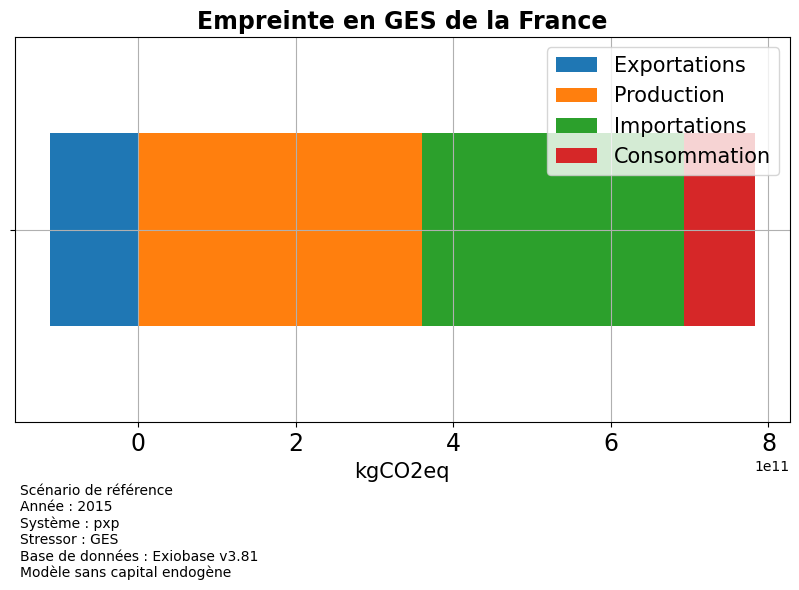

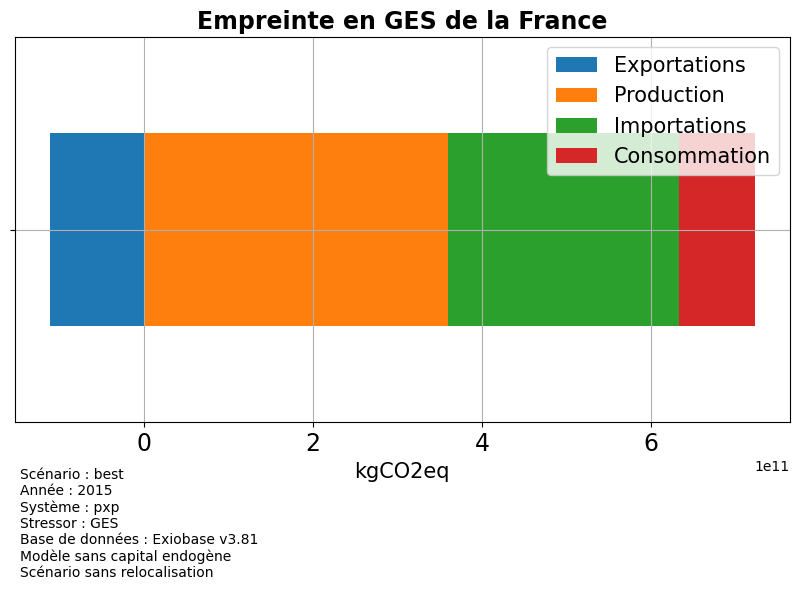

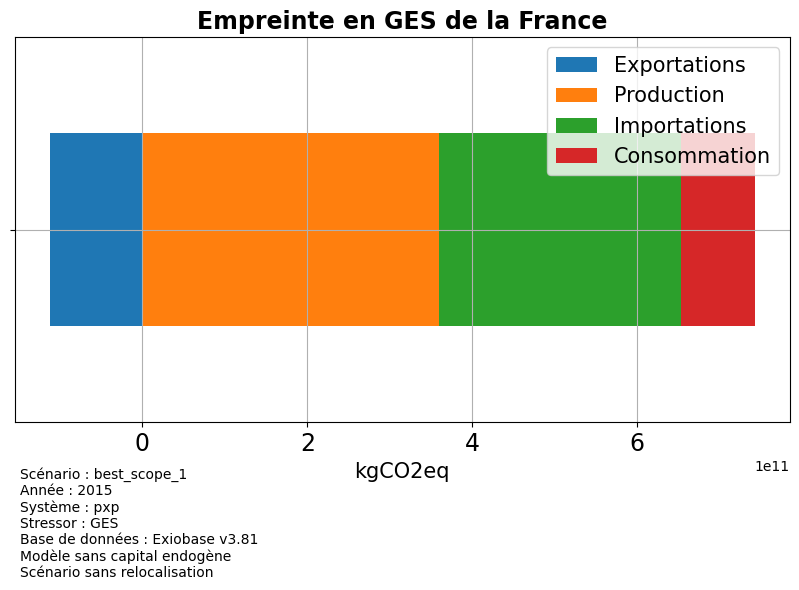

In [9]:
model.plot_footprint_FR()
model.plot_footprint_FR(counterfactual_name="best")
model.plot_footprint_FR(counterfactual_name="best_scope_1")

La méthode `plot_stressor_content_heatmap` permet d'avoir une vision globale de l'intensité en stressors des différents secteurs dans chaque région.

In [ ]:
model.plot_stressor_content_heatmap()

La méthode `plot_stressor_content_production` permet de comparer les intensités en stressors de la production de chaque région pour chaque secteur.

In [ ]:
model.plot_stressor_content_production()

Pour les deux méthodes précédentes, il est possible de saisir le nom d'un scénario en argument pour tracer la figure associée (sans argument, la figure se réfère à la référence).

In [ ]:
model.plot_footprint_FR()
for year in range(2016,2050,10):
    model.plot_footprint_FR(counterfactual_name="IMACLIM_"+str(year))
    # model.plot_footprint_FR(counterfactual_name="IMACLIM_tech"+str(year))

In [10]:
from src.utils import footprint_extractor
print(footprint_extractor(model,"FR"))
print(footprint_extractor(model.counterfactuals["best"],"FR"))
print(footprint_extractor(model.counterfactuals["best_scope_1"],"FR"))


{'Exportations': -111955116079.047, 'Production': 360221291767.31836, 'Importations': 332374048628.9911, 'Consommation': 89874365398.01366}
{'Exportations': -111809779651.02574, 'Production': 360221291767.29553, 'Importations': 272902357810.50677, 'Consommation': 89874365398.01366}
{'Exportations': -111836021818.41576, 'Production': 360221291767.29553, 'Importations': 292284674032.0514, 'Consommation': 89874365398.01366}


In [16]:
from src.utils import footprint_extractor
print(footprint_extractor(model.counterfactuals["IMACLIM_all_2050_baseline"],"FR"))

{'Exportations': -111667916532.48842, 'Production': 359929902334.1214, 'Importations': 251588373111.85562, 'Consommation': 89874365398.01366}


Les méthodes `plot_trade_synthesis`, `plot_stressor_synthesis` et `plot_substressor_synthesis` tracent chacune plusieurs graphiques permettant d'avoir une vision globale des différences entre un scénario donné et la référence concernant respectivement le commerce, le niveau global de stressors, ou bien les composantes des stressors prises séparément.

In [ ]:
model.plot_trade_synthesis("best")

In [ ]:
model.plot_substressor_synthesis("best")

In [ ]:
model.plot_substressor_synthesis("best")

In [ ]:
model.plot_substressor_synthesis("best_n")

In [ ]:
model.plot_substressor_synthesis("best")

Pour appeler une méthode sur l'ensemble des scénarios chargés dans l'objet `Model`, il suffit de suffixer la méthode par `_all`.

Toutes les figures créées sont à la fois affichées et enregistrées dans le dossier `figures`.

## 5. Améliorer la lisibilité des figures

Pour améliorer la lisibilité des figures, il est possible d'agréger les régions entre elles et/ou les secteurs entre eux. Pour cela, il suffit de renseigner les attributs `regions_mapper` et/ou `sectors_mapper` dans l'objet `Model`. Il est attendu des dictionnaires d'appariement similaires aux exemples `REGIONS_AGG` et `SECTORS_AGG` fournis dans le fichier `src/settings.py`. Pour retirer cette agrégation, il suffit d'affecter la valeur `None` aux attributs `regions_mapper` et/ou `sectors_mapper`.

_Remarque :_ plusieurs attributs de l'objet `Model` sont automatiquement modifié lorsque `regions_mapper` ou `sectors_mapper` sont modifiés par l'utilisateur, l'utilisateur n'a pas à s'en occuper.

**Attention :** ces nouvelles figures écraseront les éventuelles figures créées précédemment avec les mêmes paramètres mais une aggrégation différente (point à améliorer éventuellement par la suite).

In [ ]:
model.plot_stressor_content_production("pref_eu")

In [ ]:
from main import REGIONS_AGG

model.regions_mapper = REGIONS_AGG
model.plot_stressor_content_production("pref_eu")

In [ ]:
from main import SECTORS_AGG

model.sectors_mapper = SECTORS_AGG
model.plot_stressor_content_production("pref_eu")

In [ ]:
model.regions_mapper = None
model.plot_stressor_content_production("pref_eu")

## 6. Endogénéisation de la consommation de capital

Pour endogénéiser la consommation de capital par les différents secteurs, il suffit d'ajouter `capital=True` lors de la création d'un nouveau modèle. Le programme télécharge alors la base de données de consommation de capital et crée le modèle associé.

In [ ]:
model_cap = Model(capital=True)

In [ ]:
model_cap.iot.Z

In [ ]:
from src.utils import load_Kbar
load_Kbar(year=model_cap.base_year,
                system=model_cap.system,
                path=model_cap.capital_consumption_path,
            )

On peut alors utiliser le modèle exactement comme précédemment.

In [ ]:
model_cap.plot_footprint_FR()

La fonction `endogenous_capital_comparison` du fichier `main.py` permet de comparer les composantes de l'empreinte carbone d'une région au cours des années, avec ou sans endogénéisation du capital. Attention, si les modèles n'ont jamais été chargés, elle peut prendre du temps (compter ~10 minutes par année). Sinon, elle ne prend que quelques secondes.
À la différence des autres fonctions d'édition de figures, cette fonction renvoie un dictionnaire contenant les modèles chargés, pour les traiter plus facilement par la suite.

In [ ]:
from main import endogenous_capital_comparison

endogenous_capital_comparison(start_year=2012, end_year=2015)

## 7. Étudier d'autres stressors

Pour le moment, nous nous sommes focalisés sur les émissions de GES. Néanmoins, il est possible n'importe quel autre stressor figurant dans Exiobase 3.

Pour cela, il suffit de renseigner l'argument `stressor_params` lors de la création d'un nouvel objet `Model`. Cet argument attend un dictionnaire ayant un format bien particulier :
- `"name_FR"` : nom du type de stressor en français, pour l'affichage des graphiques (titres, légendes...)
- `"name_EN"` : nom du type de stressor en anglais, sans caractères spéciaux, sans espaces, pour les chemins d'accès
- `"unit"` : unité du stressor (telle qu'affichée sur les graphiques)
- `"proxy"` : contient un dictionnaire contenant plusieurs items correspondant à chaque composante des stressors, et associant le nom de la composante (clé) à un dictionnaire (valeur) ayant le format suivant :
    - `"exiobase_keys"` : liste des items de la matrice S d'Exiobase 3 correspondant à la clé
    - `"weight"` : une pondération éventuelle (par exemple pour travailler en CO2eq pour les GES)

À partir de ce dictionnaire, le programme va agréger les lignes désignées par les listes `"exiobase_keys"`, pour chaque item, et travailler avec les matrices `S`, `F`, `S_Y` et `F_Y` ainsi obtenues.

In [ ]:
from main import MATERIAL_PARAMS

model_materials = Model(stressor_params=MATERIAL_PARAMS)
model_materials.plot_footprint_FR()

In [ ]:
model_materials.new_counterfactual("best", DICT_SCENARIOS["best"])

In [ ]:
model_materials.plot_substressor_synthesis("best")

Pour étudier un nouveau stressor, il suffit de créer un dictionnaire similaire. Pour cela, on peut utiliser les méthodes du module `pandas` sur le MRIO brut sauvegardé au format `pickle` dans le dossier `data/exiobase`.

In [ ]:
import pickle as pkl

with open("data/exiobase/2015__pxp/2015__pxp.pickle", "rb") as f:
    mrio = pkl.load(f)

In [ ]:
mrio.satellite.S_Y.index[mrio.satellite.S_Y.index.str.contains("Gold|gold")] # this syntax means "'Gold' OR 'gold'"

In [ ]:
mrio.satellite.S_Y.index[mrio.satellite.S_Y.index.str.contains("forest|Forest")]

In [ ]:
model.iot.Z["FR"]

In [ ]:
model.counterfactuals["best"].iot.Z["FR"]